# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATED LINK**
https://github.com/saingersoll/eds220-hwk-3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [1]:
### ===== FINAL CODE =====

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# importing libraries here
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
spills = pd.read_csv('data/Spill_Incidents_20231108.csv')         # reading in csv using pd
counties = gpd.read_file('data/tl_2022/tl_2022_us_county.shp')    # reading in the shape file using gpd

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [4]:
# 1.
spills.head()         # displays the top of the spills dataframe

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
counties.head()       # displays the top of the counties dataframe

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [6]:
# 2.
spills.columns = spills.columns.str.lower().str.replace(' ','_')                # re-assigns the column names .str.lower() makes them lower case,  .str.replace(' ','_') replaces the space for _
print(spills.columns)                                                           # prints the updated column names

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')


In [7]:
# 3.
spills.info()                         # describes the data types of the columns in the dataframe in addition to attribute information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542351 entries, 0 to 542350
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   spill_number           542351 non-null  int64  
 1   program_facility_name  542345 non-null  object 
 2   street_1               542220 non-null  object 
 3   street_2               42219 non-null   object 
 4   locality               541229 non-null  object 
 5   county                 542351 non-null  object 
 6   zip_code               51201 non-null   object 
 7   swis_code              542351 non-null  int64  
 8   dec_region             542351 non-null  int64  
 9   spill_date             542199 non-null  object 
 10  received_date          541870 non-null  object 
 11  contributing_factor    542351 non-null  object 
 12  waterbody              46310 non-null   object 
 13  source                 542351 non-null  object 
 14  close_date             531652 non-nu

In [8]:
# 4. 
spills.material_family.unique()                        # Displays the unique values in material family column in spills dataframe

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [9]:
# 5.
spills.county.unique()                                 # Displays the unique values in county in spills dataframe

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [10]:
spills.spill_date = pd.to_datetime(spills.spill_date)                   # converts column to datetime64
print(spills.spill_date.dtypes)                                         # confirms previous step was successful

spills.head()                                                           # displays the first 6 rows of the df

datetime64[ns]


,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [11]:
# creating a data subset that only contains specific date range and petroleum spill information
petr_23 = spills.loc[(spills.spill_date >= '2023-01-01') & (spills.spill_date <= '2023-10-31') & (spills.material_family == 'Petroleum')]

petr_23

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541848,2208600,ZHANG RESIDENCE,11 ACORN LANE,NaN,STONY BROOK,Suffolk,NaN,5222,1,2023-01-22,01/22/2023,Equipment Failure,NaN,Private Dwelling,01/31/2023,#2 fuel oil,Petroleum,5.0,Gallons,0.0
541851,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,07/14/2023,Equipment Failure,NaN,Private Dwelling,09/18/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0
541961,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,01/10/2023,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,0.0,NaN,0.0
542244,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,05/16/2023,Equipment Failure,NaN,Private Dwelling,07/11/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [12]:
petr_23.material_family.unique()                                      # displays the unique value in the material family column is only petroleum

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [13]:
petr_23.spill_date.dt.year.unique()                                   # displays the unqiue values in the spill_date column are contained to the year 2023

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [14]:
petr_23.spill_date.dt.month.unique()                                  # displays the unqiue values in the spill_date column are contained to the months jan - oct.

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [15]:
spills_per_county = petr_23.groupby(['county']).size().reset_index(name = 'n_spills')           # groupby county, count the number of times the county experienced spills & record in a column called 'n_spills'

In [16]:
spills_per_county.head()                                                                        # double checking the desired df is output

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [17]:
# 1.
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [18]:
# 2.
counties.columns = counties.columns.str.lower()                                 # re-assigns the column names .str.lower() makes them lower case
print(counties.columns)                                                         # prints the updated column names

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'name', 'namelsad', 'lsad',
       'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat', 'aland',
       'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')


In [19]:
# 3. 
counties.info()                                                                 # describes the data types of the columns in the dataframe in addition to attribute information of each column

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   statefp   3235 non-null   object  
 1   countyfp  3235 non-null   object  
 2   countyns  3235 non-null   object  
 3   geoid     3235 non-null   object  
 4   name      3235 non-null   object  
 5   namelsad  3235 non-null   object  
 6   lsad      3235 non-null   object  
 7   classfp   3235 non-null   object  
 8   mtfcc     3235 non-null   object  
 9   csafp     0 non-null      float64 
 10  cbsafp    0 non-null      float64 
 11  metdivfp  0 non-null      float64 
 12  funcstat  3235 non-null   object  
 13  aland     3235 non-null   int64   
 14  awater    3235 non-null   int64   
 15  intptlat  3235 non-null   object  
 16  intptlon  3235 non-null   object  
 17  geometry  3235 non-null   geometry
dtypes: float64(3), geometry(1), int64(2), object(12)
memory usage: 455.0+ KB


In [20]:
# 4.
counties.crs                                                                    # describes the crs of the counties gdf

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

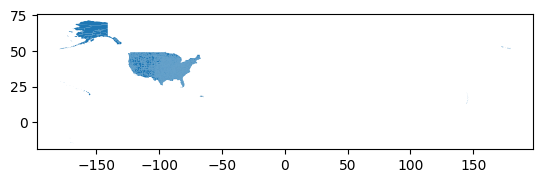

In [21]:
# 5. 
counties.plot()                                                                # plots the counties gdf

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [22]:
ny_counties = counties[counties['statefp'] == '36']                             # selects data points only in the state of ny (statefp == 36) to form a new data subset

ny_counties

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,NaN,NaN,NaN,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,NaN,NaN,NaN,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,NaN,NaN,NaN,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,NaN,NaN,NaN,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,NaN,NaN,NaN,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,NaN,NaN,NaN,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580..."
2963,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,NaN,NaN,NaN,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067..."
3157,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,NaN,NaN,NaN,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603..."
3158,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,NaN,NaN,NaN,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763..."


## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [23]:
# 1.
ny_counties.namelsad.unique()                                     # displays county column names

array(['Steuben County', 'Saratoga County', 'Allegany County',
       'Oswego County', 'Ulster County', 'St. Lawrence County',
       'Schuyler County', 'Essex County', 'Suffolk County',
       'Hamilton County', 'Dutchess County', 'Otsego County',
       'Tompkins County', 'Albany County', 'Cayuga County',
       'Greene County', 'Herkimer County', 'Warren County',
       'Jefferson County', 'Clinton County', 'Nassau County',
       'Madison County', 'Washington County', 'Westchester County',
       'Lewis County', 'Ontario County', 'Cortland County',
       'Richmond County', 'Erie County', 'Putnam County',
       'Montgomery County', 'Sullivan County', 'Orleans County',
       'Oneida County', 'Cattaraugus County', 'Yates County',
       'Tioga County', 'Monroe County', 'Schoharie County',
       'Broome County', 'Rensselaer County', 'Seneca County',
       'Queens County', 'Genesee County', 'Wayne County',
       'Niagara County', 'Kings County', 'Chemung County',
       'Wyoming C

In [24]:
# 2.
spills_per_county.county.unique()                                     # displays county column names, in this case the word county is not included in the outputs

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

 Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.

In [25]:
spills_per_county.head()

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46


In [26]:
# 3.
# setting both columns to be considered as str

spills_per_county = spills_per_county.county.astype('str')
counties = counties.namelsad.astype('str')

In [ ]:
spills_p

In [27]:
np.setdiff1d(spills_per_county, ny_counties, assume_unique = False)

TypeError: '<' not supported between instances of 'Polygon' and 'str'

In [ ]:
# 4.

In [ ]:
# 5. 


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [ ]:
# 1. 

In [ ]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

In [ ]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

In [ ]:
# 4. 

In [ ]:
# 5.

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [ ]:
# 1. 


In [ ]:
# 2.

In [ ]:
# your code here

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

In [ ]:
# your code here

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.